## Importing Libraries 

In [6]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Data Loading

In [16]:
df = pd.read_csv('hour.csv')

In [17]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Dataset Description

- **instant**: Record index
- **dteday**: Date
- **season**: Season of the year
  - 1: Winter
  - 2: Spring
  - 3: Summer
  - 4: Fall
- **yr**: Year
  - 0: 2011
  - 1: 2012
- **mnth**: Month of the year (1 to 12)
- **hr**: Hour of the day (0 to 23)
- **holiday**: Whether the day is a holiday (1 for holiday, 0 otherwise)
- **weekday**: Day of the week
- **workingday**: If the day is a working day (1 for working day, 0 for weekend or holiday)
- **weathersit**: Weather situation
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius (values derived via `(t - t_min) / (t_max - t_min)`, where `t_min = -8` and `t_max = +39`)
- **atemp**: Normalized feeling temperature in Celsius (values derived via `(t - t_min) / (t_max - t_min)`, where `t_min = -16` and `t_max = +50`)
- **hum**: Normalized humidity (values divided by 100)
- **windspeed**: Normalized wind speed (values divided by 67)
- **casual**: Count of casual users (those without an account)
- **registered**: Count of registered users (those with an account)
- **cnt**: Total count of rental bikes (sum of casual and registered users)


## Exploratory Data Analysis

In [57]:
# For better visualization
df1=df.copy()
df1['season'] = df1['season'].map({1: 'Winter',2: 'Spring', 3: 'Summer', 4: 'Fall'})
df1['yr'] = df1['yr'].map({0:'2011', 1:'2012'})
df1['mnth'] = df['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                              7:'July', 8:'August',9:'September', 10:'October',11:'November',
                              12:'December'})
df1['holiday'] = df1['holiday'].map({1:'holiday', 0:'no holiday'})
df1['weekday'] = df1['weekday'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 
                                    5:'Friday', 6:'Saturday',7:'Sunday'})
df1['workingday'] = df1['workingday'].map({1:'Working Day', 0:'Holiday'})
df1['weathersit'] = df1['weathersit'].map({1: 'Clear, Few clouds, Partly cloudy', 
                                           2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                           3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                           4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     14877 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [185]:
categorical_cols=[]
numerical_cols=[]
for col in df1.columns:
    if df1[col].dtype==object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [186]:
categorical_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [188]:
numerical_cols = numerical_cols[3:7]
numerical_cols

['temp', 'atemp', 'hum', 'windspeed']

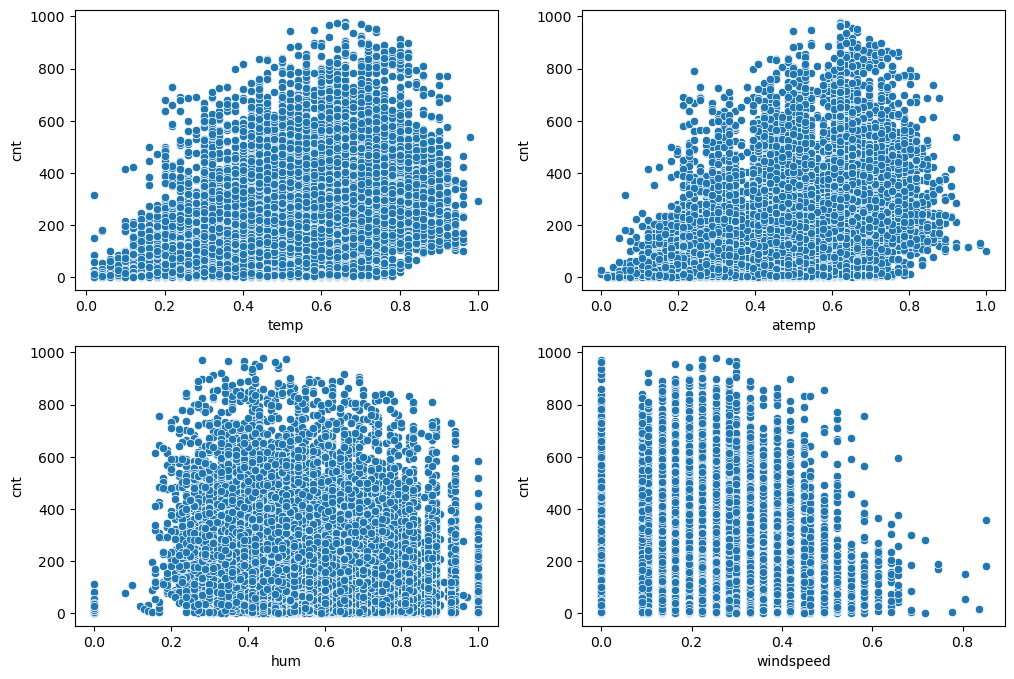

In [189]:
plt.figure(figsize=(12,8))
for i,col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data=df1, y='cnt', x=col)

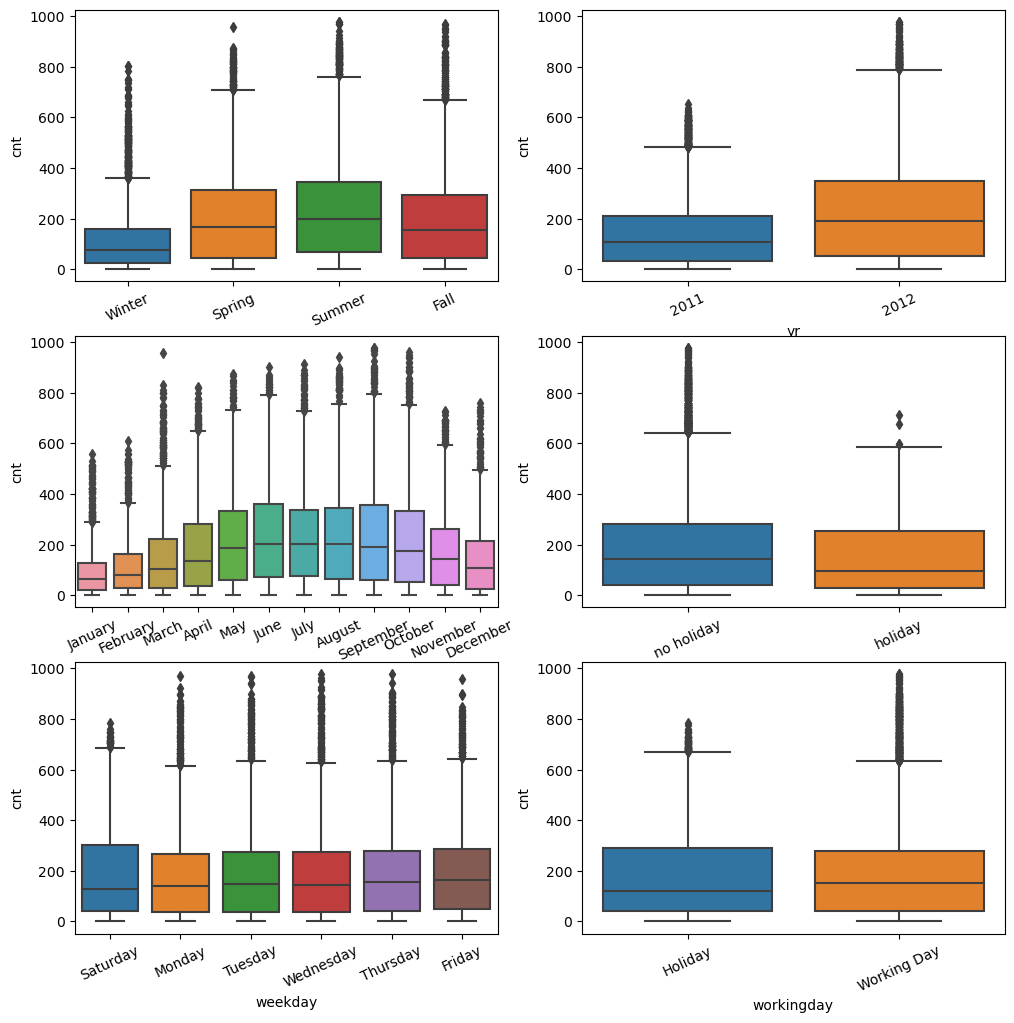

In [85]:
plt.figure(figsize=(12,12))
for i,col in enumerate(categorical_cols[:-1]):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df1, y='cnt', x=col)
    plt.xticks(rotation=25)
plt.show()

In [102]:
df_2011 = df1[df1['yr']=='2011']
df_2012 = df1[df1['yr']=='2012']
df_2011.shape, df_2012.shape

((8645, 17), (8734, 17))

In [169]:
df_yr_month = df1.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()
df_yr_month

,yr,mnth,cnt
0,2011,April,131.947149
1,2011,August,186.991792
2,2011,December,117.844804
3,2011,February,74.291217
4,2011,January,55.507267
5,2011,July,189.974462
6,2011,June,199.322222
7,2011,March,87.732877
8,2011,May,182.555108
9,2011,November,142.095967


In [170]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_yr_month['mnth'] = pd.Categorical(df_yr_month['mnth'], categories=month_order, ordered=True)

df_yr_month = df_yr_month.sort_values(by=['yr', 'mnth'])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

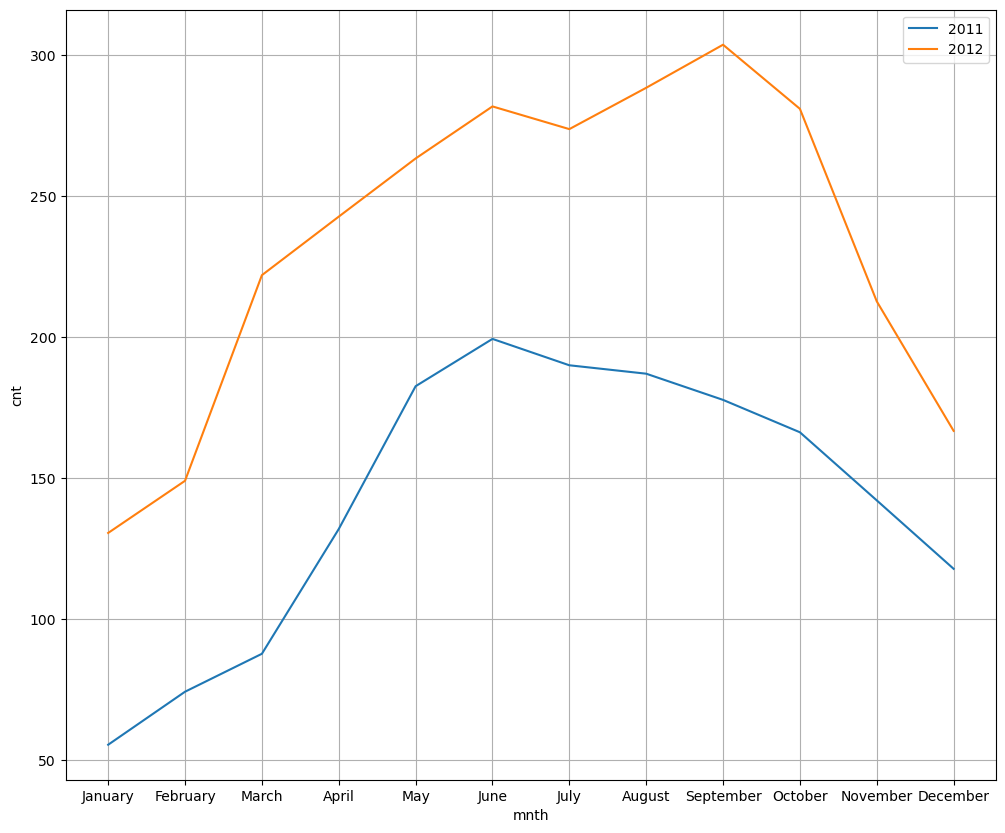

In [171]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df_yr_month[df_yr_month['yr']=='2011'], x='mnth', y='cnt', label='2011')
sns.lineplot(data=df_yr_month[df_yr_month['yr']=='2012'], x='mnth', y='cnt', label='2012')
plt.grid()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3952\3588861173.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_yr_month.pivot_table(index='yr', columns='mnth', values='cnt', aggfunc='mean')


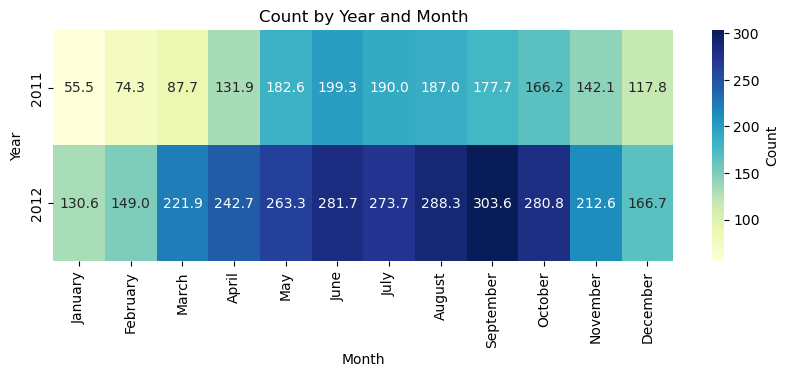

In [174]:
df_pivot = df_yr_month.pivot_table(index='yr', columns='mnth', values='cnt', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Count'}, fmt='0.1f')
plt.title('Count by Year and Month')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

- here we can clearly see that there is a increase in total number of bikes in each month from 2011 to 2012
- in 2011 the highesy number of count of bikes was in june and september in 2012

In [162]:
df_weekday = df1.groupby(['mnth','weekday'])['cnt'].sum().reset_index()
df_weekday

,mnth,weekday,cnt
0,April,Friday,182.791667
1,April,Monday,189.915888
2,April,Saturday,185.236111
3,April,Thursday,198.500000
4,April,Tuesday,189.828125
...,...,...,...
67,September,Monday,236.109948
68,September,Saturday,266.402778
69,September,Thursday,229.627907
70,September,Tuesday,217.151832


In [163]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday['mnth'] = pd.Categorical(df_weekday['mnth'], categories=month_order, ordered=True)
df_weekday['weekday'] = pd.Categorical(df_weekday['weekday'], categories=week_order, ordered=True)

df_weekday = df_weekday.sort_values(by=['mnth', 'weekday'])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

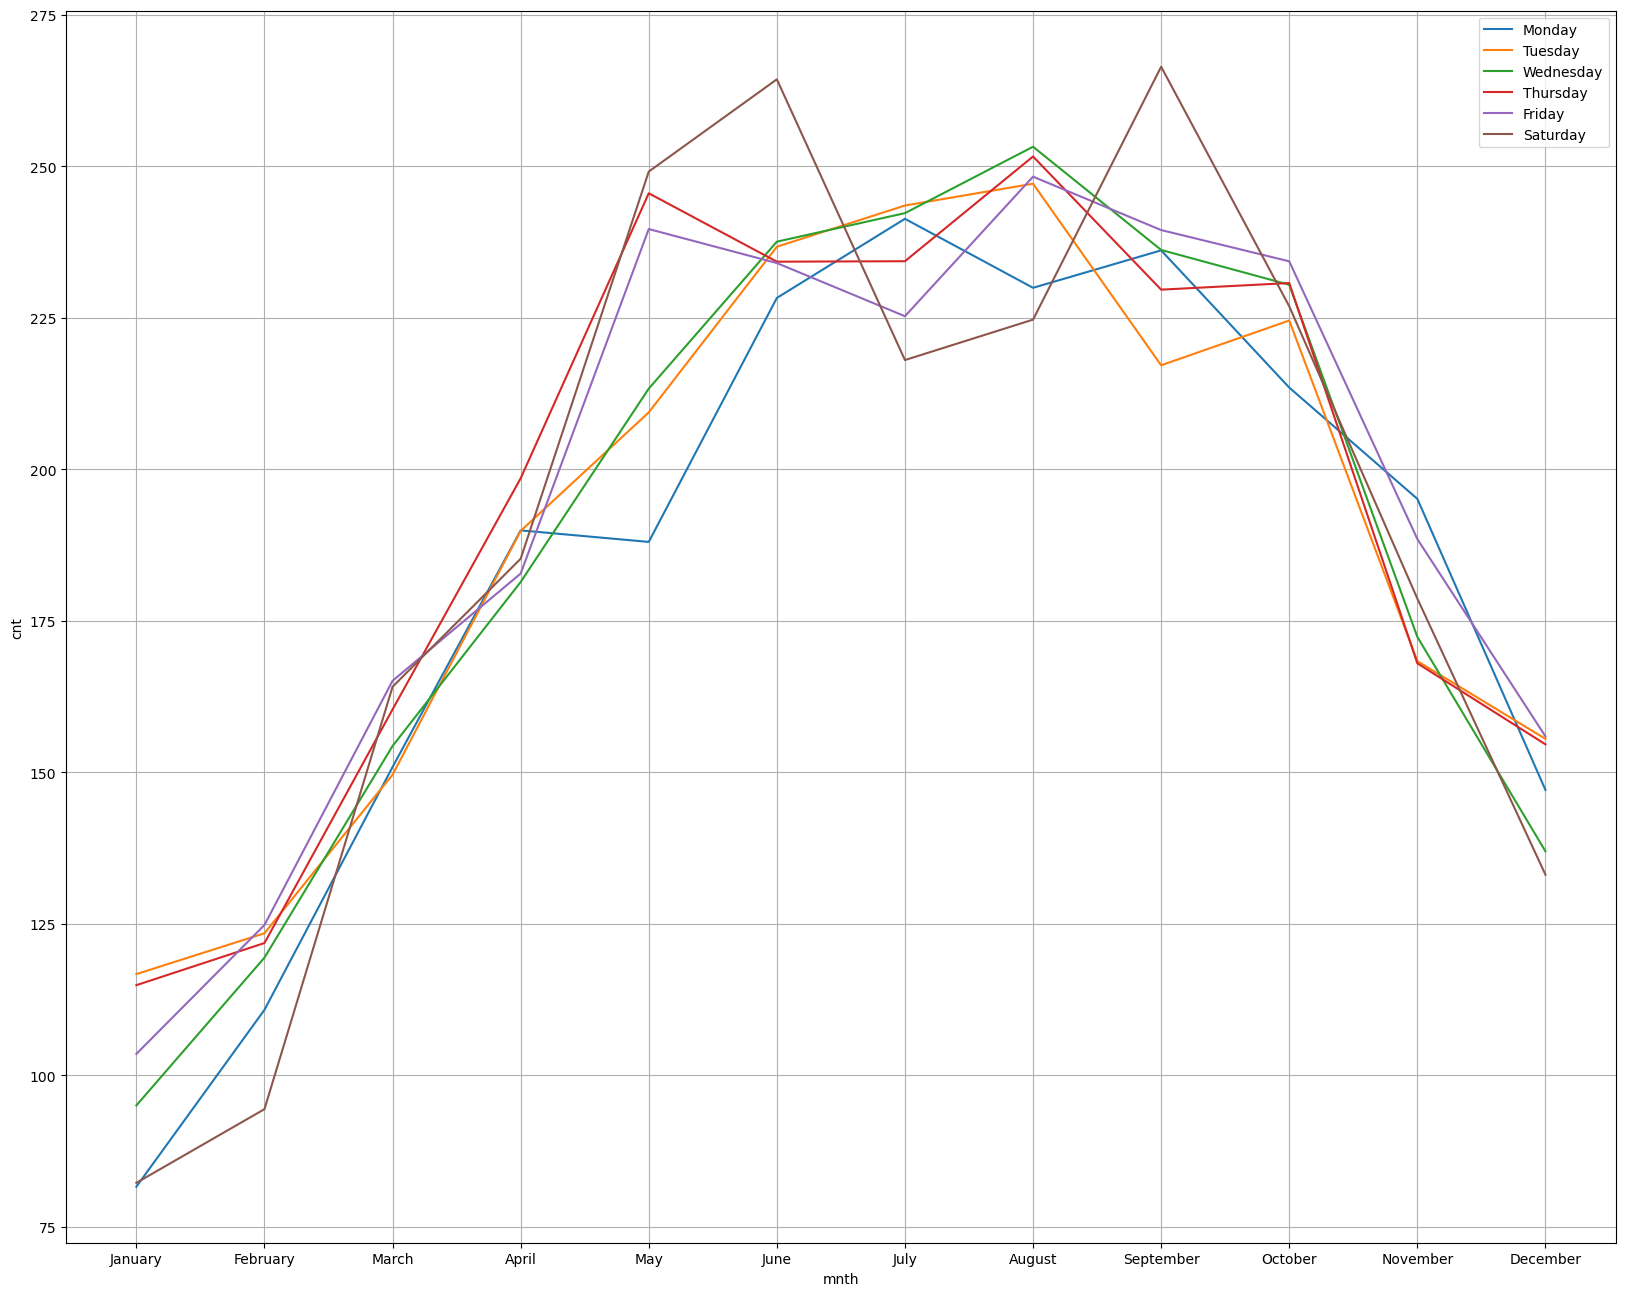

In [164]:
plt.figure(figsize=(20,16))
sns.lineplot(data=df_weekday[df_weekday['weekday']=='Monday'], x='mnth', y='cnt', label='Monday')
sns.lineplot(data=df_weekday[df_weekday['weekday']=='Tuesday'], x='mnth', y='cnt', label='Tuesday')
sns.lineplot(data=df_weekday[df_weekday['weekday']=='Wednesday'], x='mnth', y='cnt', label='Wednesday')
sns.lineplot(data=df_weekday[df_weekday['weekday']=='Thursday'], x='mnth', y='cnt', label='Thursday')
sns.lineplot(data=df_weekday[df_weekday['weekday']=='Friday'], x='mnth', y='cnt', label='Friday')
sns.lineplot(data=df_weekday[df_weekday['weekday']=='Saturday'], x='mnth', y='cnt', label='Saturday')
sns.lineplot(data=df_weekday[df_weekday['weekday']=='Sunday'], x='mnth', y='cnt', label='Sunday')
plt.grid()

Observation:
- There isn't any weekday that has the peak across all the months 
- The highest peaks are on wednesday and saturday

C:\Users\Admin\AppData\Local\Temp\ipykernel_3952\780839214.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_weekday.pivot_table(index='weekday', columns='mnth', values='cnt', aggfunc='mean')


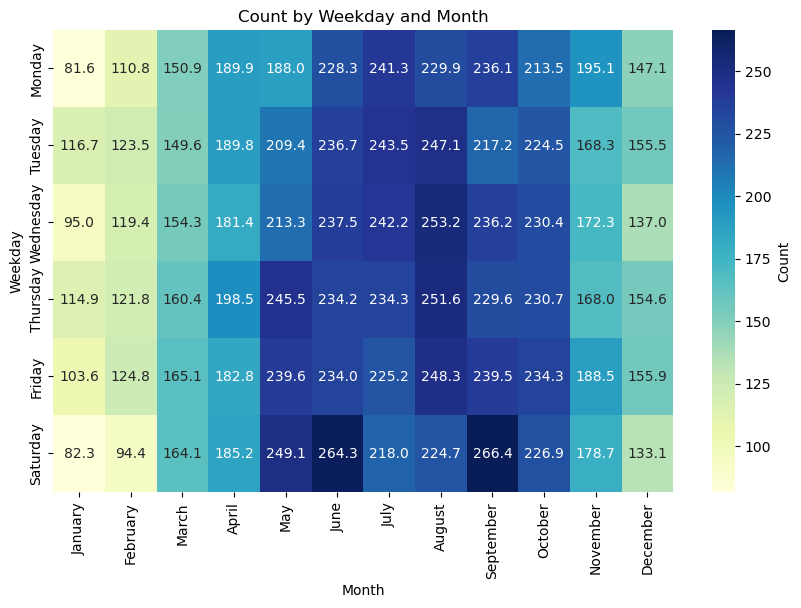

In [168]:
df_pivot = df_weekday.pivot_table(index='weekday', columns='mnth', values='cnt', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Count'}, fmt='0.1f')
plt.title('Count by Weekday and Month')
plt.ylabel('Weekday')
plt.xlabel('Month')
plt.show()

Observation:
- Interestling there are no bike sharing on sunday indicating that it may be used by working professionals
- May to october have the highest demand across all weekdays 

<Axes: xlabel='hr'>

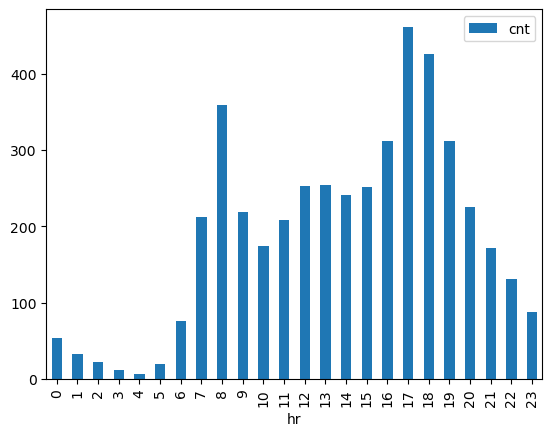

In [184]:
pd.DataFrame(df1.groupby('hr')['cnt'].mean()).plot(kind='bar')

Observatioin:
- the highest demand is at the 17th and 18th hour of the day 

In [251]:
df1['weathersit'].unique()

array(['Clear, Few clouds, Partly cloudy',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'],
      dtype=object)

In [249]:
df1.groupby('weathersit')['cnt'].mean().reset_index()

,weathersit,cnt
0,"Clear, Few clouds, Partly cloudy",204.869272
1,Heavy Rain + Ice Pallets + Thunderstorm + Mist...,74.333333
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",111.579281
3,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",175.165493


Observation:
- The demand is highest on Clear, Few clouds, Partly cloudy
- It is lowest on Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cnt', ylabel='Count'>

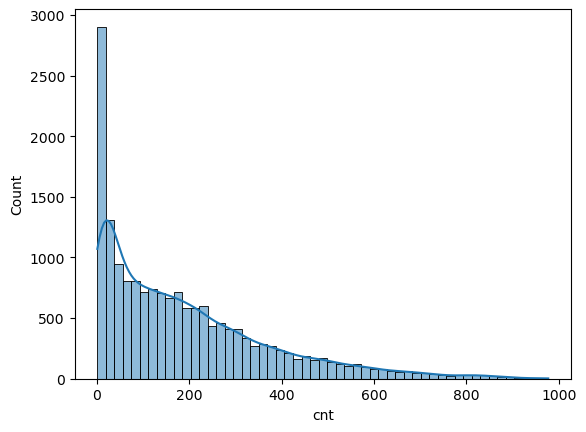

In [213]:
sns.histplot(df['cnt'], kde=True)

<Axes: xlabel='cnt'>

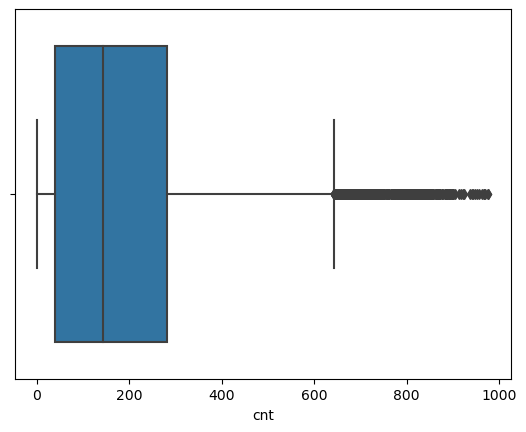

In [27]:
sns.boxplot(x=df['cnt'])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

<Axes: xlabel='cnt', ylabel='Count'>

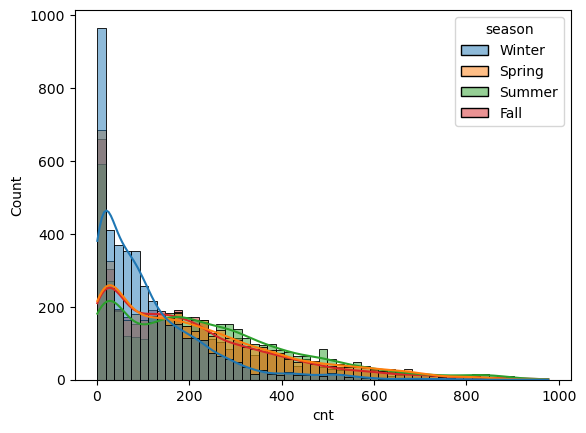

In [197]:
sns.histplot(data=df1, x='cnt',hue='season', kde=True)

In [38]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

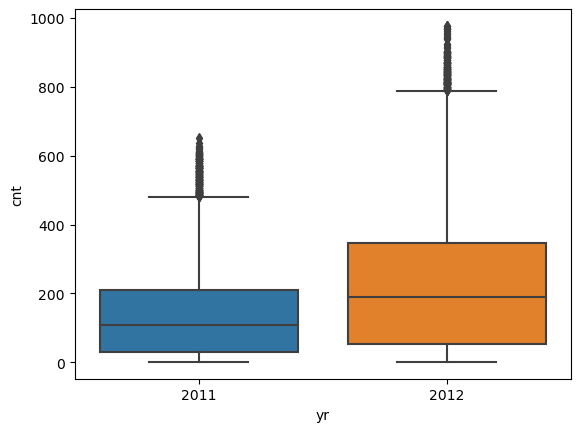

In [78]:
sns.boxplot(data = df1, y='cnt', x='yr')
plt.show()

In [199]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<Axes: >

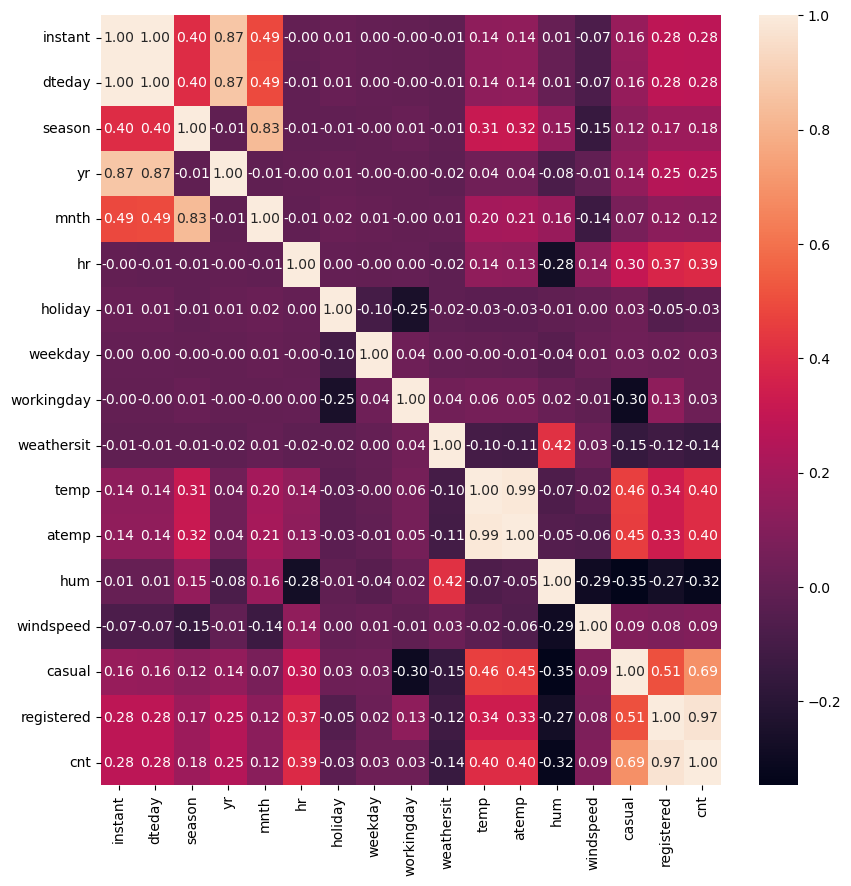

In [215]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

Observation:
- Found multicollinearity between temp and atemp so removing temp
- mnth and season are also highly correlated so keeping only season

## Model Building

In [216]:
x = df.drop(['instant', 'dteday', 'temp', 'mnth', 'casual', 'registered', 'cnt'], axis=1)
y = df['cnt']

In [217]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [218]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12165, 10), (5214, 10), (12165,), (5214,))

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [229]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'R2 Score': r2_score(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
    }

    return results

In [230]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor()]

In [231]:
models_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 
                'Gradient Boosting', 'Multi-Layer Perceptron']

In [232]:
results_list=[]
for i in range(len(models)):
    result = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    print(f"{models_names[i]}: {result}")
    results_list.append(result)

Linear Regression: {'Model': 'Linear Regression', 'R2 Score': 0.397950449083867, 'Mean Squared Error': 19891.50884502829}
Decision Tree: {'Model': 'Decision Tree', 'R2 Score': 0.8785149524510215, 'Mean Squared Error': 4013.8239355581127}
Random Forest: {'Model': 'Random Forest', 'R2 Score': 0.9342421812764775, 'Mean Squared Error': 2172.615577535618}
Gradient Boosting: {'Model': 'Gradient Boosting', 'R2 Score': 0.8542837926130615, 'Mean Squared Error': 4814.413072297155}
Multi-Layer Perceptron: {'Model': 'Multi-Layer Perceptron', 'R2 Score': 0.6207449046791511, 'Mean Squared Error': 12530.457122037793}


D:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Results

In [240]:
results_df = pd.DataFrame(results_list)
results_df

,Model,R2 Score,Mean Squared Error
0,Linear Regression,0.397950,19891.508845
1,Decision Tree,0.878515,4013.823936
2,Random Forest,0.934242,2172.615578
3,Gradient Boosting,0.854284,4814.413072
4,Multi-Layer Perceptron,0.620745,12530.457122


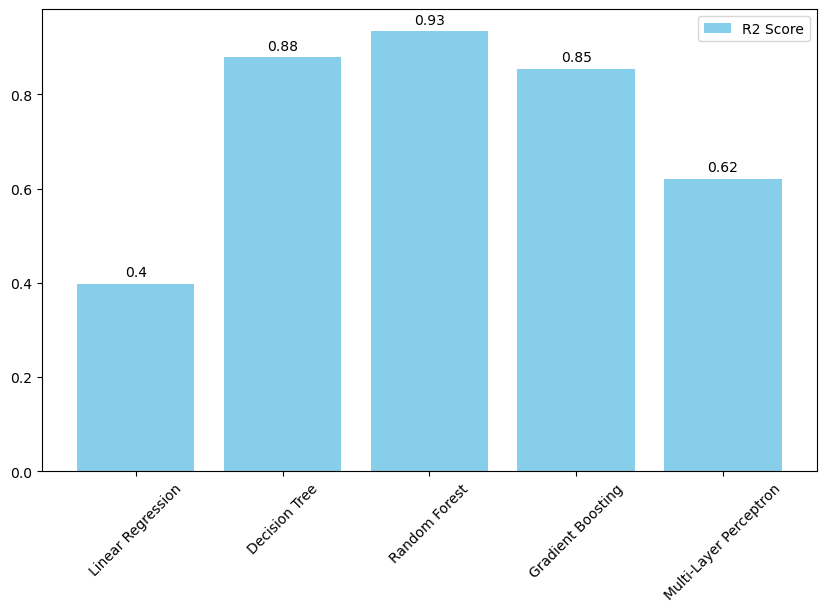

In [245]:
plt.figure(figsize=(10, 6))
bar_1 = plt.bar(x=results_df['Model'], height = results_df['R2 Score'], color='skyblue', label='R2 Score')
plt.bar_label(bar_1, results_df['R2 Score'].round(2), padding=3)
plt.xticks(results_df['Model'], rotation=45)
plt.legend()
plt.show()

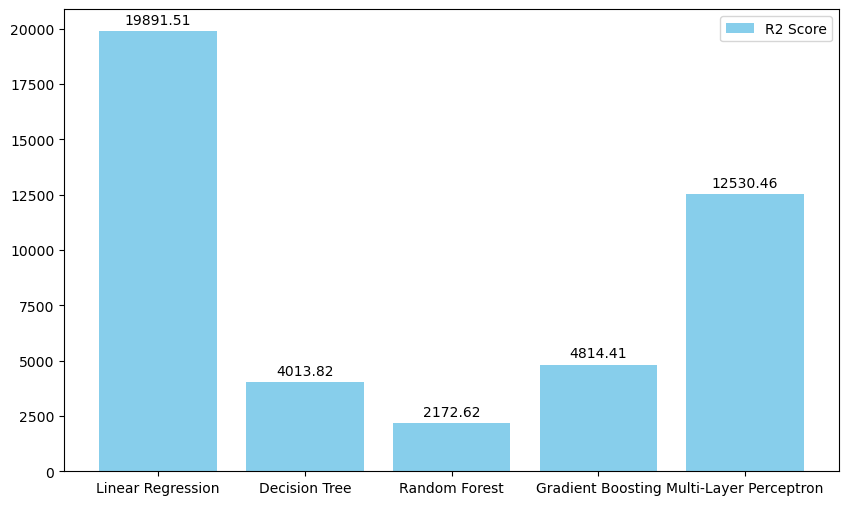

In [246]:
plt.figure(figsize=(10, 6))
bar_1 = plt.bar(x=results_df['Model'], height = results_df['Mean Squared Error'], color='skyblue', label='R2 Score')
plt.bar_label(bar_1, results_df['Mean Squared Error'].round(2), padding=3)
plt.xticks(results_df['Model'])
plt.legend()
plt.show()

Random Forest did best among all the others